# Notebook support in Sherpa

A number of objects have been updated to support HTML output when displayed in a Jupyter notebook. Let's take a quick tour!

## Data1D, Data1DInt, and Data2D

First we have the data objects:

In [1]:
import numpy as np

from sherpa.data import Data1D, Data1DInt, Data2D

x = np.arange(100, 200, 20)
y = [120, 240, 30, 95, 130]

d1 = Data1D('oned', x, y)
d1i = Data1DInt('onedint', x[:-1], x[1:], y[:-1])
               
x0 = [150, 250, 100]
x1 = [250, 200, 200]
y2 = [50, 40, 70]
d2 = Data2D('twod', x0, x1, y2)      

Each can be displayed with `print`, which shows a textual representation of attribute and values:

In [2]:
print(d1)

name      = oned
x         = Int64[5]
y         = Int64[5]
staterror = None
syserror  = None


Or they can be displayed as-is which, **in a Jupyter notebook**, will display either a plot or a HTML table. The `Data1D` and `Data1DInt` classes will dislay a plot (if the `pylab` plotting backend is selected), and the `Data2D` class a table.

In [3]:
d1

<Data1D data set instance 'oned'>

In [4]:
print(d1i)

name      = onedint
xlo       = Int64[4]
xhi       = Int64[4]
y         = Int64[4]
staterror = None
syserror  = None


In [5]:
d1i

<Data1DInt data set instance 'onedint'>

As mentioned, the `Data2D` class just gets a fancy HTML table but no plot:

In [6]:
print(d2)

name      = twod
x0        = Int64[3]
x1        = Int64[3]
y         = Int64[3]
shape     = None
staterror = None
syserror  = None


In [7]:
d2

<Data2D data set instance 'twod'>

## DataPHA, DataARF, and DataRMF

The Astronomy-specific PHA, ARF, and RMF data classes can also be displayed. These (when you have `pylab` selected) display both the data and a table of information.

In [8]:
from sherpa.astro import io

pha = io.read_pha('../sherpa-test-data/sherpatest/9774.pi')
arf = io.read_arf('../sherpa-test-data/sherpatest/9774.arf')
rmf = io.read_rmf('../sherpa-test-data/sherpatest/9774.rmf')

read ARF file ../sherpa-test-data/sherpatest/9774.arf
read RMF file ../sherpa-test-data/sherpatest/9774.rmf
read background file ../sherpa-test-data/sherpatest/9774_bg.pi


In [9]:
print(pha)

name           = ../sherpa-test-data/sherpatest/9774.pi
channel        = Float64[1024]
counts         = Float64[1024]
staterror      = None
syserror       = None
bin_lo         = None
bin_hi         = None
grouping       = None
quality        = None
exposure       = 75141.227687398
backscal       = 4.3513325252917e-07
areascal       = 1.0
grouped        = False
subtracted     = False
units          = energy
rate           = True
plot_fac       = 0
response_ids   = [1]
background_ids = [1]


In [10]:
pha

<DataPHA data set instance '../sherpa-test-data/sherpatest/9774.pi'>

The PHA object will change the display based on the data - that is, if you change the filtering and grouping you will see a different plot,
and the table will also change:

In [11]:
pha.notice(0.3, 7)
pha.group_counts(20, tabStops=~pha.mask)

pha

<DataPHA data set instance '../sherpa-test-data/sherpatest/9774.pi'>

It will also change if you change the analysis setting:

In [12]:
pha.set_analysis('wave')

pha

<DataPHA data set instance '../sherpa-test-data/sherpatest/9774.pi'>

The ARF and RMF objects do not change based on their settings:

In [13]:
print(arf)

name     = ../sherpa-test-data/sherpatest/9774.arf
energ_lo = Float64[1078]
energ_hi = Float64[1078]
specresp = Float64[1078]
bin_lo   = None
bin_hi   = None
exposure = 75141.231099099
ethresh  = 1e-10


In [14]:
arf

<DataARF data set instance '../sherpa-test-data/sherpatest/9774.arf'>

In [15]:
print(rmf)

name     = ../sherpa-test-data/sherpatest/9774.rmf
energ_lo = Float64[1078]
energ_hi = Float64[1078]
n_grp    = UInt64[1078]
f_chan   = UInt64[1481]
n_chan   = UInt64[1481]
matrix   = Float64[438482]
e_min    = Float64[1024]
e_max    = Float64[1024]
detchans = 1024
offset   = 1
ethresh  = 1e-10


For the RMF, five energies are selected that span the response of the instrument, and the response to these monochromatic energies are displayed.

In [16]:
rmf

<DataRMF data set instance '../sherpa-test-data/sherpatest/9774.rmf'>

## DataIMG

For images with little metadata, and no WCS information, we just get an image:

In [17]:
img = io.read_image('../sherpa-test-data/sherpatest/img.fits')

In [18]:
img

<DataIMG data set instance '../sherpa-test-data/sherpatest/img.fits'>

If the image contains WCS information, or some basic metadata, then we will get extra tables
(unfortunately this test image doesn't display particularly wonderfully as the source
is faint!).

In [19]:
img2 = io.read_image('../sherpa-test-data/sherpatest/acisf08478_000N001_r0043_regevt3_srcimg.fits')

img2

<DataIMG data set instance '../sherpa-test-data/sherpatest/acisf08478_000N001_r0043_regevt3_srcimg.fits'>

As with the PHA object, we can change the display slightly, such as changing the `coord` setting and spatially filtering the data:

In [20]:
img2.set_coord('physical')
img2.notice2d('circle(3150, 4520, 20)')

img2

<DataIMG data set instance '../sherpa-test-data/sherpatest/acisf08478_000N001_r0043_regevt3_srcimg.fits'>

## Models and parameters

Models and parameters can also be displayed directly as HTML tables, mirroring their `print` output.

In [21]:
from sherpa.models.basic import Gauss2D, Const2D

mgauss = Gauss2D()
mconst = Const2D()

mgauss.xpos = 3150
mgauss.ypos = 4520

mdl = mgauss + mconst

We can compare the model output (this also works with a single component, such as `mgauss` and `mconst`):

In [22]:
print(mdl)

(gauss2d + const2d)
   Param        Type          Value          Min          Max      Units
   -----        ----          -----          ---          ---      -----
   gauss2d.fwhm thawed           10  1.17549e-38  3.40282e+38           
   gauss2d.xpos thawed         3150 -3.40282e+38  3.40282e+38           
   gauss2d.ypos thawed         4520 -3.40282e+38  3.40282e+38           
   gauss2d.ellip frozen            0            0        0.999           
   gauss2d.theta frozen            0     -6.28319      6.28319    radians
   gauss2d.ampl thawed            1 -3.40282e+38  3.40282e+38           
   const2d.c0   thawed            1 -3.40282e+38  3.40282e+38           


In [23]:
mdl

<BinaryOpModel model instance '(gauss2d + const2d)'>

We can have a display for parameters (I chose this model since we can see the minimum and maximum colums get displayed as units of $\pi$ in the notebook-display version):

In [24]:
print(mgauss.theta)

val         = 0.0
min         = -6.283185307179586
max         = 6.283185307179586
units       = radians
frozen      = True
link        = None
default_val = 0.0
default_min = -6.283185307179586
default_max = 6.283185307179586


In [25]:
mgauss.theta

Component,Parameter,Thawed,Value,Min,Max,Units
gauss2d,theta,,0.0,-2π,2π,radians


## Fitting data

Various objects related to fitting will also display in Jupyter notebooks. I fit a simple model (the model we just created, in fact) to the last image we were looking at. For this example I use the `sherpa.astro.ui` layer to fit, rather than creating the fit object manually.

In [26]:
from sherpa.astro import ui

ui.set_data(img2)
ui.set_source(mdl)

ui.set_stat('cash')
ui.set_method('simplex')

failed to import sherpa.image.ds9_backend due to 
'RuntimeErr: DS9Win unusable: Could not find ds9 on your PATH'


The output of the fit call is still just text:

In [27]:
ui.fit()

Dataset               = 1
Method                = neldermead
Statistic             = cash
Initial fit statistic = 2727.34
Final fit statistic   = 233.065 at function evaluation 841
Data points           = 1258
Degrees of freedom    = 1253
Change in statistic   = 2494.28
   gauss2d.fwhm   5.23044     
   gauss2d.xpos   3146.36     
   gauss2d.ypos   4519.61     
   gauss2d.ampl   0.445907    
   const2d.c0     0.0120648   


However, we can see the model results (as shown above):

In [28]:
ui.get_source()

<BinaryOpModel model instance '(gauss2d + const2d)'>

We can also display the fit results directly (I am dropping the comparison to the `print` output in part to show you can just call routines like `ui.get_git_results` and see the display without needing to call `print`, at least in a Jupyter notebook):

In [29]:
ui.get_fit_results()

Parameter,Best-fit value
gauss2d.fwhm,5.23044
gauss2d.xpos,3146.36
gauss2d.ypos,4519.61
gauss2d.ampl,0.445907
const2d.c0,0.0120648


Similarly, the output of `conf` (or `covar`) is just text, but the results can be accessed directly with `ui.get_conf_results` or `ui.get_covar_results`:

In [30]:
ui.conf()

gauss2d.xpos lower bound:	-0.681324
gauss2d.ypos lower bound:	-0.634733
gauss2d.fwhm lower bound:	-0.747274
gauss2d.ypos upper bound:	0.668076
gauss2d.ampl lower bound:	-0.159288
gauss2d.xpos upper bound:	0.704771
gauss2d.fwhm upper bound:	1.19291
gauss2d.ampl upper bound:	0.21565
const2d.c0 lower bound:	-0.00297985
const2d.c0 upper bound:	0.00356563
Dataset               = 1
Confidence Method     = confidence
Iterative Fit Method  = None
Fitting Method        = neldermead
Statistic             = cash
confidence 1-sigma (68.2689%) bounds:
   Param            Best-Fit  Lower Bound  Upper Bound
   -----            --------  -----------  -----------
   gauss2d.fwhm      5.23044    -0.747274      1.19291
   gauss2d.xpos      3146.36    -0.681324     0.704771
   gauss2d.ypos      4519.61    -0.634733     0.668076
   gauss2d.ampl     0.445907    -0.159288      0.21565
   const2d.c0      0.0120648  -0.00297985   0.00356563


In [31]:
ui.get_conf_results()

Parameter,Best-fit value,Lower Bound,Upper Bound
gauss2d.fwhm,5.23044,-0.747274,1.19291
gauss2d.xpos,3146.36,-0.681324,0.704771
gauss2d.ypos,4519.61,-0.634733,0.668076
gauss2d.ampl,0.445907,-0.159288,0.21565
const2d.c0,0.0120648,-0.00297985,0.00356563


The `get_stat_info` call returns information for each dataset. As this is a list, the overall output just gets displayed as text, but if you access an individual element you will get a HTML table: 

In [32]:
ui.get_stat_info()

[<Statistic information results instance>]

In [33]:
ui.get_stat_info()[0]

<Statistic information results instance>

Once you have created an interval- or region-projection plot, such as this comparison of the x and y centers of the gaussian, you can display the results with the relavant `get` call (in this case `ui.get_reg_proj`).

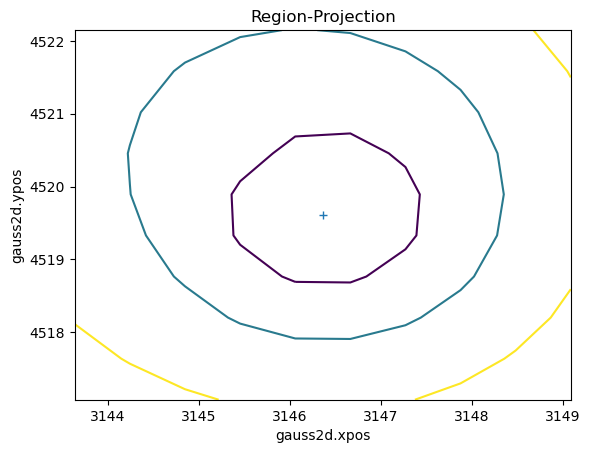

In [34]:
ui.reg_proj(mgauss.xpos, mgauss.ypos)

In [35]:
ui.get_reg_proj()